In [1]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline


In [2]:


def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)



In [3]:


URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   


In [4]:
source = 'race_car.mp4'
cap = cv2.VideoCapture(source)

if not cap.isOpened():
    print("Error: Could not open video.")

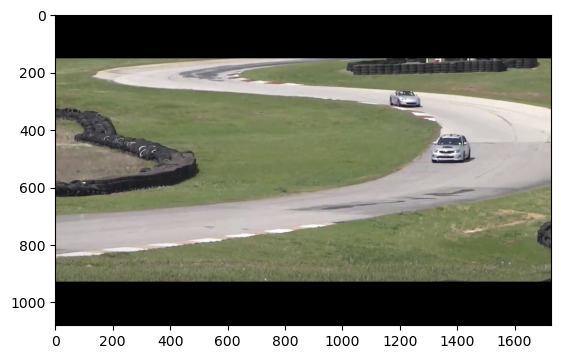

In [5]:
ret, frame = cap.read()

if not ret:
    print("Error: Could not read frame.")
plt.imshow(frame[..., ::-1]);plt.show()

1. YouTubeVideo
2. display
3. HTML

are not part of OpenCV. It is likely from the IPython display utilities provided in Jupyter Notebook environments. Specifically:

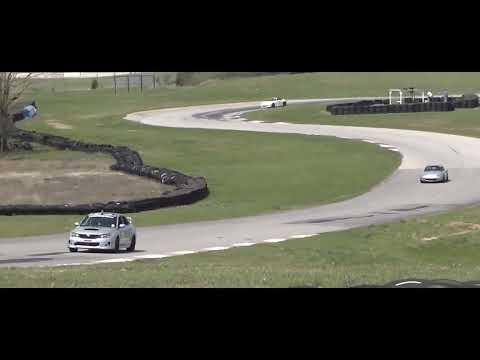

In [6]:
video = YouTubeVideo('RwxVEjv78LQ', width=700, height=438)
display(video)

##### Write Video using opencv

###### Function syntax
`videowriter object = cv.VideoWriter( filename, fourcc, fps, frameSize)`

1. fourcc: 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.

2. fps: Framerate of the created video stream.

3. frameSize: Size of the video frame
4. filename: Name of the output video file.

In [7]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


The aim of the code is to convert the input file
1. To a diffrent format; .avi and mp4
2. To be able to maintain same properties like fps, width and height

MJPEG is widely used for high-quality compressed video (e.g., in surveillance or image processing).

XVID is a popular codec for general-purpose, lossy compression.

In [8]:
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        out_avi.write(frame)
        out_mp4.write(frame)
    else:   
        break

cap.release()
out_avi.release()
out_mp4.release()

##### Summary of What the Code Does:

1. Opens the input video file (race_car.mp4).
2. Creates two output video files:
    1. One in .avi format using the MJPEG codec.
    2. One in .mp4 format using the XVID codec.
3. Reads the frames of the input video.
4. Writes each frame to both the .avi and .mp4 output files.
5. When all frames are processed, it releases the resources and saves the two output video files.

In [11]:
# Change video encoding of mp4 file from XVID to h264 
!ffmpeg -y -i 'race_car_out.mp4' -c:v libx264 "race_car_out_x264.mp4"  -hide_banner -loglevel error

1. ! - This is used in Jupyter Notebook to execute a shell command directly from a notebook cell.
2. -y - allow overwrite
3. -i -specify input file
4. -c:v specifies the codec to use to encode the video stream
5. libx264 - uses the H.264 codec
6. -hide-banner - suppress extra ffmpeg info from being printed to console
7. -loglevel error -only print errors, hide warnings

In [ ]:


mp4 = open("race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")



1. `mp4 = open("race_car_out_x264.mp4", "rb").read()` reads the file in binary mode `rb`

2. `b64encode(mp4).decode()` encode data into base64(convert binary to ASCII)

3. `data_url = "data:video/mp4;base64," + b64encode(mp4).decode()` constructs dataurl, specifies formatmp4 and encoding base64

##### Why Use Base64 Encoding?

Embeds the video directly into the notebook without needing to serve it from an external file or server.

##### Limitations

File Size: Base64 encoding increases the size of the video data by approximately 33%, so very large videos may cause performance issues in the notebook.

In [ ]:
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)